In [5]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Regular expression to capture the data
pattern = re.compile(r"type\s*:\s*(\d+),\s*d\s*:\s*(\d+),\s*weight\s*=\s*([\d.]+),\s*result\s*=\s*(\d+)")

# Function to read a file and extract data using the regex
def extract_data_from_file(file_path):
    extracted_data = []
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                type_val = int(match.group(1))
                d_val = int(match.group(2))
                weight_val = float(match.group(3))
                result_val = int(match.group(4))
                
                extracted_data.append({
                    'type': type_val,
                    'd': d_val,
                    'weight': weight_val,
                    'result': result_val
                })
    
    return extracted_data

# Example usage
# Assuming the text file is named 'data.txt' and is in the current directory
# extracted_data = extract_data_from_file('data.txt')
# print(extracted_data)


In [6]:
raw_data = pd.DataFrame(extract_data_from_file('result_0902.txt'))
raw_data.head()

,type,d,weight,result
0,35,440,0.333333,18
1,35,420,0.333333,11
2,35,340,0.333333,17
3,35,360,0.333333,9
4,35,260,0.333333,15


In [7]:
data35 = raw_data[raw_data.type == 35]
data30 = raw_data[raw_data.type == 30]
data25 = raw_data[raw_data.type == 25]

In [8]:
data35_pivoted = pd.pivot(data = data35, index = 'd', columns='weight', values = 'result')
data30_pivoted = pd.pivot(data = data30, index = 'd', columns='weight', values = 'result')
data25_pivoted = pd.pivot(data = data25, index = 'd', columns='weight', values = 'result')

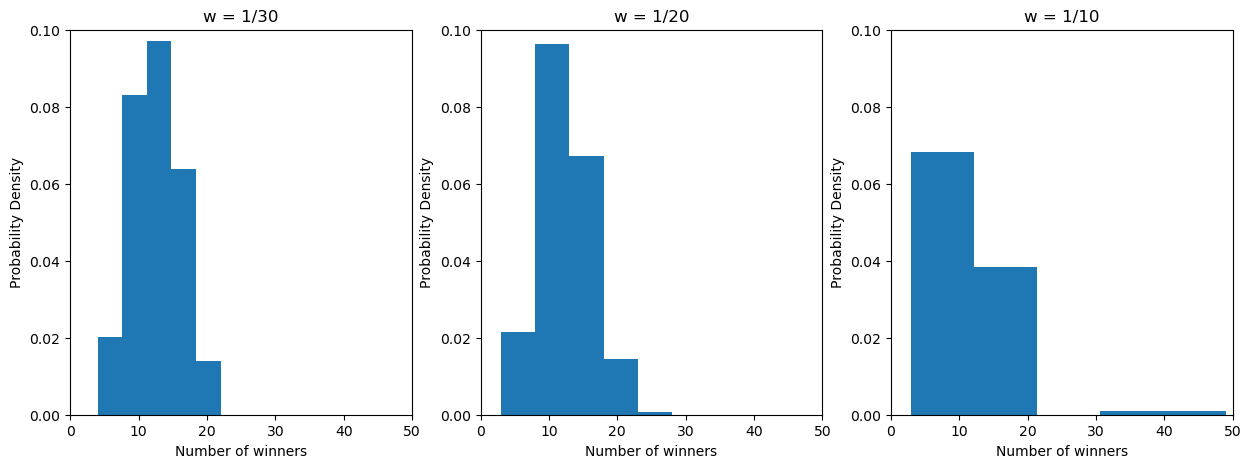

In [52]:
titles = ['1/30', '1/20', '1/10']
fig, ax = plt.subplots(1,3, figsize = (15,5))
for i, column in enumerate(data25_pivoted.columns):
    ax[i].hist(x = data25_pivoted[column], bins=5, density = True)    
    ax[i].set_title(f"w = {titles[i]}")
    ax[i].set_xlabel('Number of winners')
    ax[i].set_ylabel('Probability Density')
    ax[i].set_xlim(0,50)
    ax[i].set_ylim(0, 0.1)


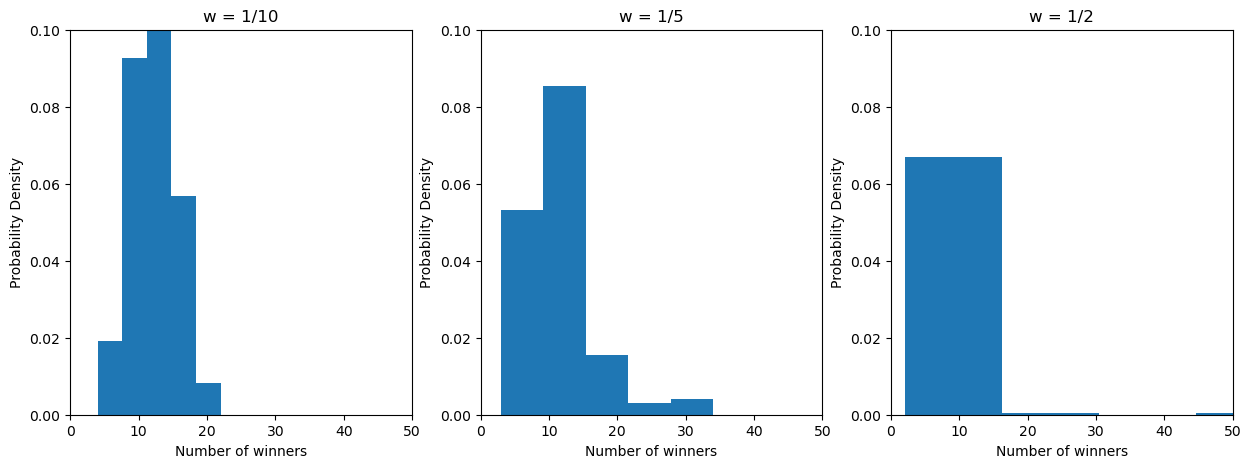

In [53]:
titles = ['1/10', '1/5', '1/2']
fig, ax = plt.subplots(1,3, figsize = (15,5))
for i, column in enumerate(data30_pivoted.columns):
    ax[i].hist(x = data30_pivoted[column], bins=5, density = True)    
    ax[i].set_title(f"w = {titles[i]}")
    ax[i].set_xlabel('Number of winners')
    ax[i].set_ylabel('Probability Density')
    ax[i].set_xlim(0,50)
    ax[i].set_ylim(0, 0.1)


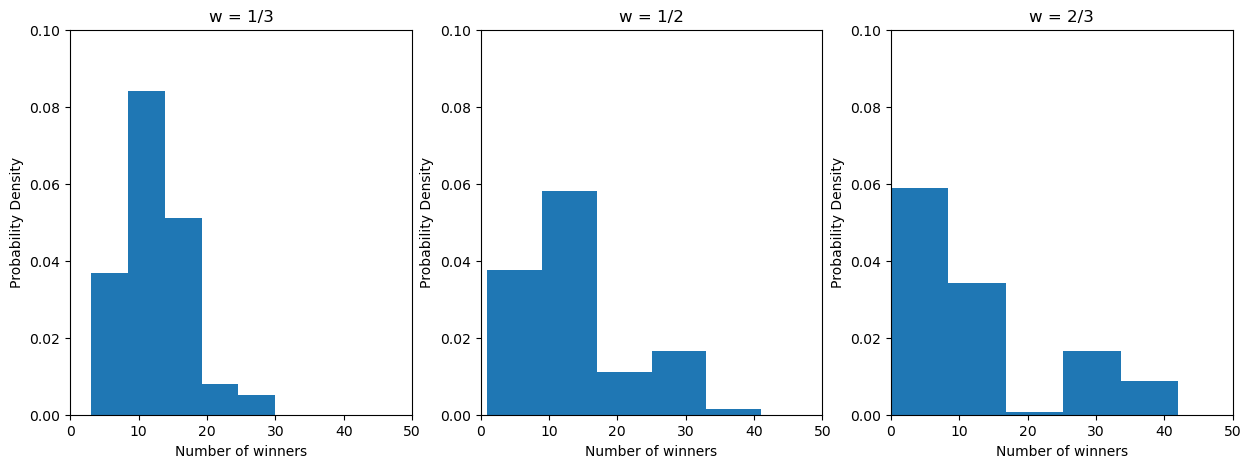

In [54]:
titles = ['1/3', '1/2', '2/3']

fig, ax = plt.subplots(1,3, figsize = (15,5))
for i, column in enumerate(data35_pivoted.columns):
    ax[i].hist(x = data35_pivoted[column], bins=5, density = True)    
    ax[i].set_title(f"w = {titles[i]}")
    ax[i].set_xlabel('Number of winners')
    ax[i].set_ylabel('Probability Density')
    ax[i].set_xlim(0,50)
    ax[i].set_ylim(0, 0.1)

In [55]:
print(data25_pivoted.mean())
print(data25_pivoted.var())
print(data30_pivoted.mean())
print(data30_pivoted.var())
print(data30_pivoted.mean())
print(data30_pivoted.var())


weight
0.033333    12.553459
0.050000    12.202532
0.100000    11.843137
dtype: float64
weight
0.033333    12.317322
0.050000    14.181073
0.100000    28.467117
dtype: float64


In [56]:
print(data30_pivoted.mean())
print(data30_pivoted.var())


weight
0.1    12.156156
0.2    11.728972
0.5    10.670927
dtype: float64
weight
0.1     10.596024
0.2     24.016939
0.5    126.868928
dtype: float64


In [57]:
print(data35_pivoted.mean())
print(data35_pivoted.var())

weight
0.333333    12.374233
0.500000    13.037975
0.666667    12.782178
dtype: float64
weight
0.333333     23.059519
0.500000     58.100141
0.666667    110.601403
dtype: float64


In [17]:
# 텍스트 데이터를 계속 추가하는 대신, 파일에서 데이터를 읽어옵니다.
with open('result_0903.txt', 'r') as file:
    text_data = file.readlines()

# 정규표현식으로 데이터를 추출하는 함수
def extract_values(line):
    pattern = re.compile(r"group(\d+)\s*:\s*d\s*:\s*(\d+),\s*weight\s*=\s*[\d.]+,\s*result\s*=\s*(\d+)")
    match = pattern.search(line)
    
    if match:
        group = int(match.group(1))
        draw = int(match.group(2))
        result = int(match.group(3))
        return group, draw, result
    else:
        return None

# 데이터프레임에 넣기 위한 리스트 생성
data = []
for line in text_data:
    values = extract_values(line)
    if values:
        data.append(values)

# DataFrame 생성
df = pd.DataFrame(data, columns=['Group', 'Draw', 'Result'])

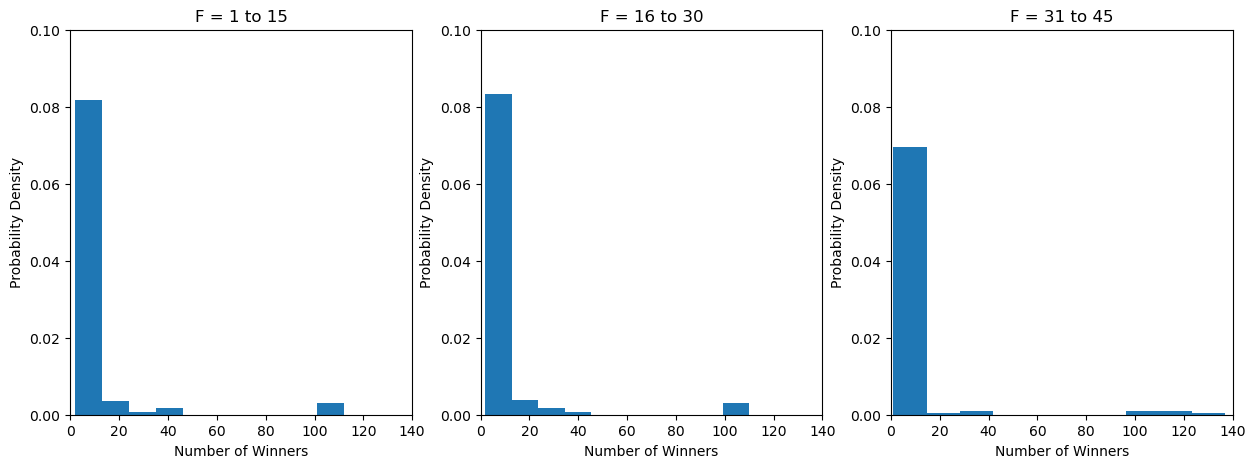

In [58]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

for i in range(3):
    ax[i].hist(df[df.Group == (i+1)].Result, density=True)
    ax[i].set_xlim(0,140)
    ax[i].set_ylim((0,0.1))
    ax[i].set_xlabel('Number of Winners')
    ax[i].set_ylabel('Probability Density')
    ax[i].set_title(f'F = {1+15*i} to {15*(i+1)}')

In [39]:
df.Group

0      1
1      2
2      3
3      1
4      2
      ..
445    2
446    3
447    1
448    2
449    3
Name: Group, Length: 450, dtype: int64